In [53]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [5]:
library(tidyverse)
library(gapminder)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



<span style="float:left; border: 1px solid #aaa; margin: 2px;">

```
> print(df)
# A tibble: 100 x 3
     x1 x2        y
  <dbl> <fct> <dbl>
1 3.91  a      22.9
2 7.95  b      30.4
3 0.525 a     143. 
# ... with 97 more rows
```
</span>
<span style="float:left; border: 1px solid #aaa; margin: 2px;">

```
> summary(df)
       x1          x2           y           
 Min.   : 0.1942   a:50   Min.   :-227.376  
 1st Qu.: 2.5972   b:50   1st Qu.: -73.853  
 Median : 5.5929          Median :  11.907  
 Mean   : 6.4042          Mean   :   2.252  
 3rd Qu.: 8.8575          3rd Qu.:  74.171  
 Max.   :24.4541          Max.   : 303.760  
```
</span>

<span style="float:left; border: 1px solid #aaa; margin: 2px;">

```
Call:
lm(formula = y ~ x1 * x2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-222.28  -63.68   12.43   76.39  253.39 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -49.958     23.273  -2.147   0.0343 *
x1             7.404      2.958   2.503   0.0140 *
x2b           22.155     36.319   0.610   0.5433  
x1:x2b        -1.836      4.521  -0.406   0.6855  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 107.3 on 96 degrees of freedom
Multiple R-squared:  0.08986,	Adjusted R-squared:  0.06142 
F-statistic: 3.159 on 3 and 96 DF,  p-value: 0.02818
```
</span>
<span style="float:left">
    
### Review questions
1. What is the $p$-value for $H_0: \beta_{x_1} = 0$?
2. What is the expectation of $y$ given $x_1 = 3$ and $x_2 = a$?
3. What does $\operatorname{corr}(y,\hat{y})$ equal?
4. Approximately what is the expectation of $y$ given $x_1 = 3$?
5. What is the $p$-value for $$H_0: \beta_{x_1} = \beta_{x_2 = b} = \beta_{x_1 \times (x_2 = b)} = 0?$$

</span>

# Lecture 22: Analysis of the HIV epidemic

In [13]:
library(readxl)
hiv = readxl::read_xlsx("../lecture21/indicator hiv estimated prevalence% 15-49.xlsx") %>% 
      gather(key = year, value = "hiv_rate", -1, convert = T) %>%   
    mutate(hiv_rate = as.numeric(hiv_rate),
           year = make_date(year)) %>% rename(country=`Estimated HIV Prevalence% - (Ages 15-49)`)
hiv_gap = gapminder %>% mutate(year = make_date(year)) %>% left_join(hiv) %>% 
    replace_na(list(hiv_rate=0)) %>% print

Joining, by = c("country", "year")
Warning message:
“Column `country` joining factor and character vector, coercing into character vector”

# A tibble: 1,704 x 7
   country     continent year       lifeExp      pop gdpPercap hiv_rate
   <chr>       <fct>     <date>       <dbl>    <int>     <dbl>    <dbl>
 1 Afghanistan Asia      1952-01-01    28.8  8425333      779.        0
 2 Afghanistan Asia      1957-01-01    30.3  9240934      821.        0
 3 Afghanistan Asia      1962-01-01    32.0 10267083      853.        0
 4 Afghanistan Asia      1967-01-01    34.0 11537966      836.        0
 5 Afghanistan Asia      1972-01-01    36.1 13079460      740.        0
 6 Afghanistan Asia      1977-01-01    38.4 14880372      786.        0
 7 Afghanistan Asia      1982-01-01    39.9 12881816      978.        0
 8 Afghanistan Asia      1987-01-01    40.8 13867957      852.        0
 9 Afghanistan Asia      1992-01-01    41.7 16317921      649.        0
10 Afghanistan Asia      1997-01-01    41.8 22227415      635.        0
# … with 1,694 more rows


How has HIV affective life expectancy? Let's look at this for the countries that have the highest infection rates:
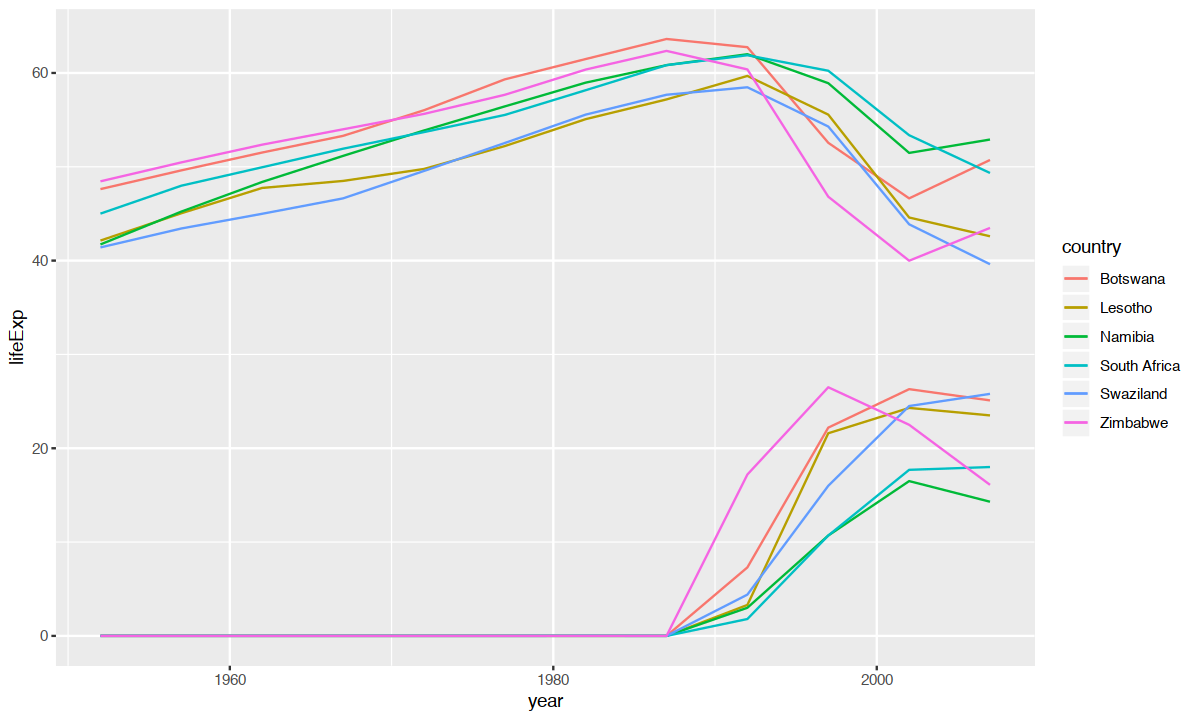

In [36]:
# Solution

### Two $y$-axes
Like pie charts, this is an example of something that you are not "supposed" to do, but everyone does.
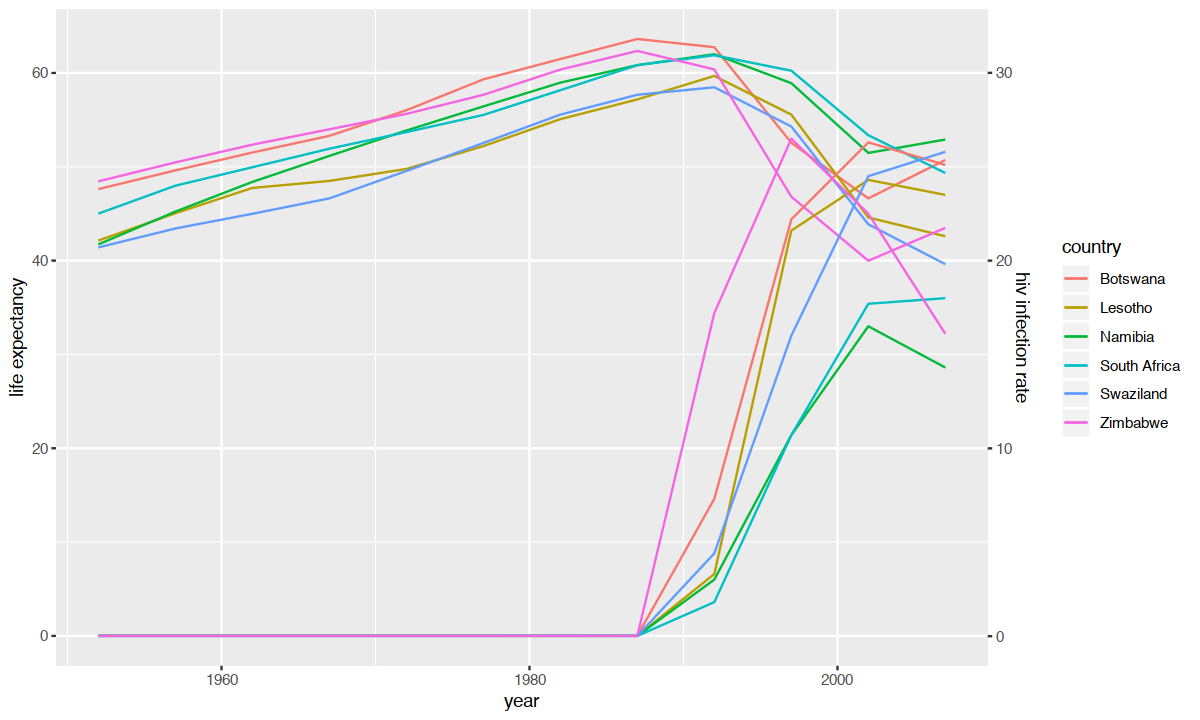

In [37]:
# Solution

### Effects of antiretroviral therapy (ART)
Beginning in the early 2000s, a class of highly effective ART drugs became available in these countries. You can already start to see evidence of this in these plots. Let's [acquire some more data](http://apps.who.int/gho/data/node.main.623?lang=en) to understand how the epidemic has progressed over the last 20 years. 

In [43]:
print(load("who_hiv.RData"))

[1] "art"       "hiv.2000s"


In [44]:
hiv.2000s %>% print

# A tibble: 309 x 8
   publishstate gho              year region       deaths     lb      ub country
   <chr>        <chr>           <dbl> <chr>         <int>  <int>   <int> <chr>  
 1 Published    Number of deat…  2018 Africa       470000 340000  630000 <NA>   
 2 Published    Number of deat…  2018 Americas      49000  36000   65000 <NA>   
 3 Published    Number of deat…  2018 Eastern Med…  15000  10000   23000 <NA>   
 4 Published    Number of deat…  2018 Europe        38000  28000   49000 <NA>   
 5 Published    Number of deat…  2018 South-East … 150000 110000  240000 <NA>   
 6 Published    Number of deat…  2018 Western Pac…  48000  40000   61000 <NA>   
 7 Published    Number of deat…  2018 (WHO) Global 770000 570000 1100000 <NA>   
 8 Published    Number of deat…  2000 Europe           NA     NA      NA Albania
 9 Published    Number of deat…  2000 Africa         4800   3500    6400 Angola 
10 Published    Number of deat…  2000 Americas       1400   1200    1700 Argent…
# … with

In [46]:
art %>% print

# A tibble: 166 x 8
   publishstate gho                region     year deaths    lb    ub country   
   <chr>        <chr>              <chr>     <dbl>  <int> <int> <int> <chr>     
 1 Published    Estimated antiret… Europe     2018     55    43    64 <NA>      
 2 Published    Estimated antiret… Americas   2018     50    44    57 Barbados  
 3 Published    Estimated antiret… Europe     2018     59    48    75 Belarus   
 4 Published    Estimated antiret… Europe     2018     NA    NA    NA Belgium   
 5 Published    Estimated antiret… Americas   2018     28    26    31 Belize    
 6 Published    Estimated antiret… Africa     2018     36    30    45 Central A…
 7 Published    Estimated antiret… Africa     2018     51    40    63 Chad      
 8 Published    Estimated antiret… Americas   2018     63    56    70 Chile     
 9 Published    Estimated antiret… Eastern …  2018     30    25    38 Djibouti  
10 Published    Estimated antiret… Americas   2018     56    43    73 Dominican…
# … with

In [ ]:
# Solution